In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Data/dataset.csv")
df.head()

,period,CS_Index,West North Central,New England,East North Central,Middle Atlantic,Mountain,New England.1,Pacific,South Atlantic,West North Central.1,West South Central,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,"Financial obligations ratio, seasonally adjusted","Consumer debt service ratio, seasonally adjusted","Debt service ratio, seasonally adjusted","Mortgage debt service ratio, seasonally adjusted"
0,2000-January,100.589697,151.57,127.99,150.48,118.85,165.07,127.99,122.51,133.79,151.57,139.65,137.42,126.0,67.0,4.0,16.532775,5.937883,11.503203,5.565320
1,2000-February,101.692479,152.74,127.91,149.71,118.42,165.48,127.91,121.47,134.19,152.74,139.50,137.26,126.6,78.0,4.1,16.574865,5.973133,11.555449,5.582317
2,2000-March,102.783829,153.15,129.86,151.06,119.62,166.34,129.86,123.09,134.77,153.15,140.74,138.32,125.1,88.0,4.0,16.616956,6.008382,11.607695,5.599313
3,2000-April,103.996444,154.52,131.19,151.77,120.61,166.87,131.19,123.86,135.89,154.52,141.43,139.26,124.1,78.0,3.8,16.659046,6.043632,11.659941,5.616310
4,2000-May,105.252818,154.98,132.91,152.17,121.02,167.46,132.91,125.02,136.52,154.98,141.90,139.89,121.0,77.0,4.0,16.708283,6.088313,11.718836,5.630523


In [8]:
# Assign the data to X and y

X = df.drop(columns=["period","CS_Index"])
y = df["CS_Index"].values.reshape(-1, 1)
print(X.shape, y.shape)

(226, 18) (226, 1)


In [13]:
df.describe()

,CS_Index,West North Central,New England,East North Central,Middle Atlantic,Mountain,New England.1,Pacific,South Atlantic,West North Central.1,West South Central,USA,Housing Affordability Index,Market Absorption Rate (%),Unemployment Rate,"Financial obligations ratio, seasonally adjusted","Consumer debt service ratio, seasonally adjusted","Debt service ratio, seasonally adjusted","Mortgage debt service ratio, seasonally adjusted"
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,162.484559,203.837522,204.924513,178.170177,192.793319,244.109115,204.924513,214.781283,200.843805,203.837522,197.161150,199.006947,148.880973,57.933628,6.016372,16.487091,5.758438,11.391777,5.633339
std,30.045812,24.886260,27.898600,16.485208,29.660829,49.181035,27.898600,50.555253,34.291132,24.886260,36.244822,30.536871,27.361627,26.965822,1.778351,0.970401,0.515658,1.204127,0.905575
min,100.589697,151.570000,127.910000,149.710000,118.420000,165.070000,127.910000,121.470000,133.790000,151.570000,139.500000,137.260000,101.000000,20.000000,3.700000,14.898461,4.887206,9.839414,4.238888
25%,140.861007,191.420000,196.070000,164.745000,188.372500,203.190000,196.070000,176.277500,177.595000,191.420000,167.705000,180.075000,125.725000,35.000000,4.700000,15.478929,5.304356,10.029141,4.742610
50%,161.933711,202.395000,207.970000,175.950000,200.690000,239.445000,207.970000,211.100000,198.335000,202.395000,194.415000,197.350000,147.650000,49.000000,5.500000,16.809772,5.660542,11.807178,5.780469
75%,188.497691,214.165000,225.267500,189.927500,213.175000,281.655000,225.267500,259.855000,230.047500,214.165000,216.605000,221.125000,170.750000,79.750000,7.200000,17.298897,6.236344,12.421624,6.332479
max,213.479024,267.450000,253.530000,223.020000,237.780000,363.930000,253.530000,313.200000,271.750000,267.450000,280.900000,268.270000,210.000000,127.000000,10.000000,18.132870,6.712232,13.215389,7.206650


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [31]:
scaler = StandardScaler().fit(X_train)

In [34]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Create the model using LinearRegression

### BEGIN SOLUTION - needed to run ElasticNet due to model over fit
from sklearn.linear_model import ElasticNet
model = ElasticNet()
### END SOLUTION

In [62]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
model.coef_

Training Score: 0.996592446643372
Testing Score: 0.9946267328585223


/Users/Troy/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([-0.05987544, -0.00084343, -0.20121689, -0.        ,  0.00071199,
        0.16089587,  0.62566191,  0.08946118,  0.        ,  0.        ,
       -0.1524916 , -0.04483922, -0.03119138, -0.        ,  0.        ,
        0.        ,  0.        , -0.        ])

In [58]:
#X = df.drop(columns=["period","CS_Index"])
#y = df["CS_Index"]

#from statsmodels.api import OLS
#model = OLS(y_train, X_train).fit()
#predictions = model.predict(X) # make the predictions by the model


#model.summary()

Text(0.5,1,'Residual Plot')

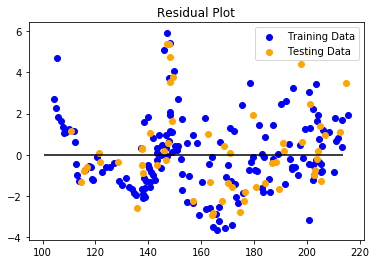

In [63]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
#Testing and training data are close and my residuals are low so the model is a good fit